<a href="https://colab.research.google.com/github/hanahh080601/Colab/blob/main/Digit_Recognization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train / 255
x_test = x_test / 255
print(x_train.shape)
print(y_train.shape)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)


In [ ]:
model = tf.keras.models.Sequential()

In [ ]:
model.add(tf.keras.layers.Flatten(input_shape = (28,28)))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3, verbose=2)
history = model.fit(x_train, y_train, epochs=50, shuffle=True, callbacks=callback, verbose=2)

Epoch 1/50
1875/1875 - 3s - loss: 0.0451 - accuracy: 0.9852
Epoch 2/50
1875/1875 - 3s - loss: 0.0191 - accuracy: 0.9932
Epoch 3/50
1875/1875 - 3s - loss: 0.0173 - accuracy: 0.9941
Epoch 4/50
1875/1875 - 3s - loss: 0.0148 - accuracy: 0.9950
Epoch 5/50
1875/1875 - 3s - loss: 0.0150 - accuracy: 0.9952
Epoch 6/50
1875/1875 - 3s - loss: 0.0140 - accuracy: 0.9952
Epoch 7/50
1875/1875 - 3s - loss: 0.0117 - accuracy: 0.9957
Epoch 8/50
1875/1875 - 3s - loss: 0.0100 - accuracy: 0.9968
Epoch 9/50
1875/1875 - 3s - loss: 0.0093 - accuracy: 0.9973
Epoch 10/50
1875/1875 - 3s - loss: 0.0096 - accuracy: 0.9971
Epoch 11/50
1875/1875 - 3s - loss: 0.0104 - accuracy: 0.9963
Epoch 12/50
1875/1875 - 3s - loss: 0.0073 - accuracy: 0.9975
Epoch 13/50
1875/1875 - 3s - loss: 0.0073 - accuracy: 0.9977
Epoch 14/50
1875/1875 - 3s - loss: 0.0074 - accuracy: 0.9977
Epoch 15/50
1875/1875 - 3s - loss: 0.0094 - accuracy: 0.9968
Epoch 00015: early stopping


In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 928us/step - loss: 0.1217 - accuracy: 0.9767


[0.12166300415992737, 0.9767000079154968]

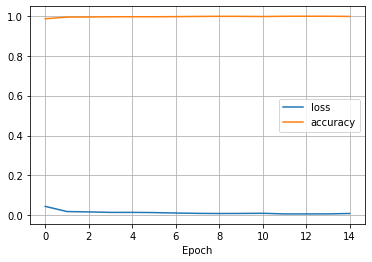

In [ ]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.xlabel('Epoch')
    plt.legend()
    plt.grid(True)
plot_loss(history)

In [ ]:
pred = model.predict(x_test)
#pred = tf.nn.softmax(pred)

Nhập số thứ tự của một ảnh bất kì trong x_test (0 => 9999): 12


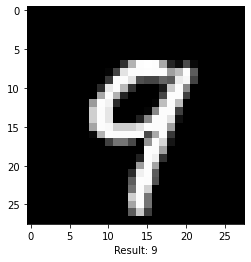

In [ ]:
i = int(input("Nhập số thứ tự của một ảnh bất kì trong x_test (0 => 9999): "))
plt.imshow(x_test[i].reshape(28,28), 'gray')
label = np.argmax(pred[i])
plt.xlabel("Result: " + str(label))
plt.show()

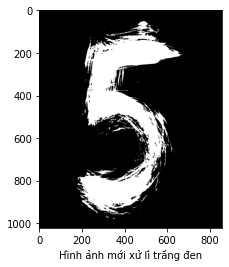

In [ ]:
img = cv2.imread("digit1.png", cv2.IMREAD_GRAYSCALE)
thresh = 127
img_bw = cv2.threshold(img, 0, thresh, 1)[1]
plt.imshow(img_bw, 'gray')
img_bw = np.expand_dims(img_bw, 2)
img_bw = cv2.resize(img_bw, (28,28)).reshape(1,28,28)
img_bw = img_bw / 255
plt.xlabel("Hình ảnh mới xử lí trắng đen")
plt.show()

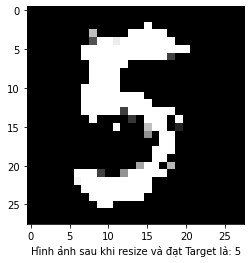

In [ ]:
pred = model.predict(img_bw)
plt.imshow(img_bw[0].reshape(28,28), 'gray')
label = np.argmax(pred[0])
plt.xlabel("Hình ảnh sau khi resize và đạt Target là: " + str(label))
plt.show()